# コレログラム

## 概要


**コレログラム（Correlogram）** とは，複数の量的変数を対象として，その **相関係数** を **色** で表すグラフ（ **サイズ** で表す[流儀](https://clauswilke.com/dataviz/visualizing-associations.html#associations-correlograms)もあるようです）です．
[ヒートマップ](https://kakeami.github.io/viz-madb/charts4amounts/heatmap.html)の一種と捉えることができます．

これにより変数同士の相関を概観できます．
特に[散布図行列](https://kakeami.github.io/viz-madb/charts4assocs/scatter.html)を描けないほど大量の量的変数間の関係を分析する際に効果的です．

::: {note}
時系列解析において，自己相関を見るために時点をずらした系列との相関係数を示したものもコレログラムと呼びますが，ここで紹介するのは変数同士の相関係数を示したものです．
:::

![](../figs/charts/correlo.png)

上図は，作品ごとの平均掲載位置・平均ページ数・掲載週数の相関係数を表すコレログラムです．

## Plotlyによる作図方法

Plotlyでは`plotly.figure_factory.create_annotated_heatmap()`を応用して作図できます．

```python
import plotly.figure_factory as ff

# 相関係数を計算して順序を調整
df_corr = df.corr().iloc[::-1]
fig = ff.create_annotated_heatmap(
    z=df_corr.values,
    x=list(df_corr.index.values),
    y=list(df_corr.columns.values),
    annotation_text=df_corr.values,
)
```

上記の例では，`df`の相関行列`df_corr`を計算し，`.iloc`で順序を調整したあとでヒートマップのオブジェクト`fig`を作成します．
[ヒートマップ](https://kakeami.github.io/viz-madb/charts4amounts/heatmap.html)で利用した`plotly.express.density_heatmap()`を採用しなかったのは，相関係数を付記できなかったためです．

## MADB Labを用いた作図例

### 下準備

In [28]:
import pandas as pd
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [29]:
# 前処理の結果，以下に分析対象ファイルが格納されていることを想定
PATH_DATA = '../../data/preprocess/out/episodes.csv'
# Jupyter Book用のPlotlyのrenderer
RENDERER = 'plotly_mimetype+notebook'

In [30]:
# 連載週数の最小値
MIN_WEEKS = 5

In [31]:
def show_fig(fig):
    """Jupyter Bookでも表示可能なようRendererを指定"""
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
    fig.show(renderer=RENDERER)

In [32]:
df = pd.read_csv(PATH_DATA)

### 作品別の平均掲載位置と掲載週数

In [33]:
df_plot = \
    df.groupby(['cname'])\
    [['pages', 'pageStartPosition']].\
    agg(['count', 'mean']).reset_index()
df_plot.columns = [
    '作品名', '掲載週数', '平均ページ数',
    '_weeks', '平均掲載位置']
df_plot = \
    df_plot[df_plot['掲載週数'] >= MIN_WEEKS].\
    reset_index(drop=True)
df_plot = df_plot.drop(columns=['_weeks'])
df_corr = df_plot.corr().iloc[::-1]

In [36]:
# 作図対象
df_corr

掲載週数    平均ページ数    平均掲載位置
平均掲載位置 -0.310917 -0.175234  1.000000
平均ページ数 -0.076751  1.000000 -0.175234
掲載週数    1.000000 -0.076751 -0.310917

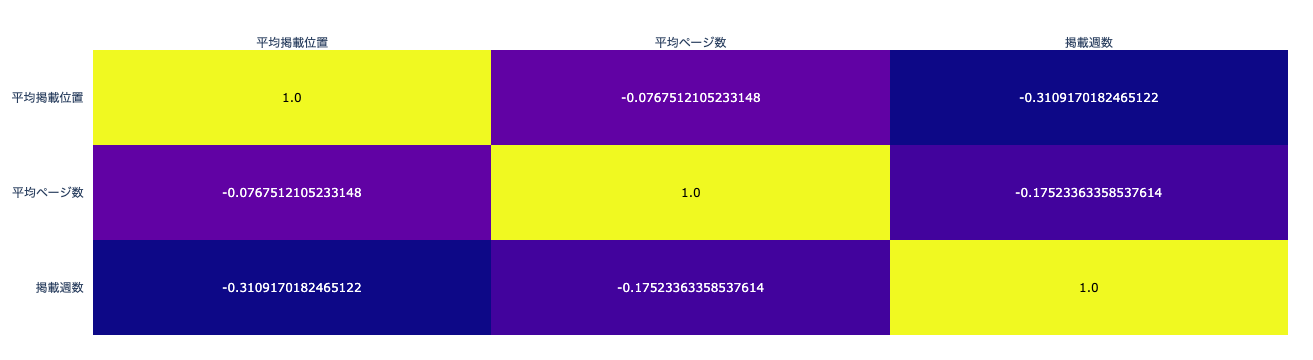

In [37]:
fig = ff.create_annotated_heatmap(
    df_corr.values,
    x=list(df_corr.index.values),
    y=list(df_corr.columns.values),
    annotation_text=df_corr.values,
    #colorscale='BlueRed_r'
)
show_fig(fig)

相関係数以外の情報が欠落していることにご注意ください．
三変数程度なら[散布図行列](https://kakeami.github.io/viz-madb/charts4assocs/scatter.html#id7)を使ったほうが良さそうですね．